In [2]:
import os
import warnings
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy import stats

In [3]:
destination =  os.environ.get('LR_Destination')
ChurnData = pd.read_csv(str(destination + '/' + 'WA_Fn-UseC_-Telco-Customer-Churn.csv'))

#First drop off customerID column
if 'customerID' in ChurnData.columns.values:
     ChurnData = ChurnData.drop(['customerID'],axis=1)
else:
     1==1

#Converting Total Charges to Float
ChurnData['TotalCharges'] = pd.to_numeric(ChurnData['TotalCharges'], errors='coerce').fillna(pd.to_numeric(ChurnData['TotalCharges'], errors='coerce').mean())


unique_values_dict = {}
for cols in ChurnData.columns.values:
    if ChurnData[cols].dtypes != 'int64' and ChurnData[cols].dtypes != 'float64':
          unique_values_dict[cols] = ChurnData[cols].unique()

for i in unique_values_dict:
    remapped_values = {}
    names_and_remapped_values = {}
    #  print(i, unique_values_dict[i])

    #for i in range of length of values in key:values for gender
    for iterator in range(len(unique_values_dict[i])):
        remapped_values[unique_values_dict[i][iterator]] = iterator

        names_and_remapped_values[i] = remapped_values 

    for key in names_and_remapped_values:
        ChurnData[key] = ChurnData[key].map(names_and_remapped_values[key])

# Linearity Assumption

### After loading in the data, we c|an observe a linear relationship between the independent variable, and the log-odds of the dependent variable. This is a major assumption of the logistic regression. The model assumes this relationship for binary classification.

Optimization terminated successfully.
         Current function value: 0.578562
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.568022
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567145
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.564132
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.510569
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.578527
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577936
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577476
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.515126
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.575824
  

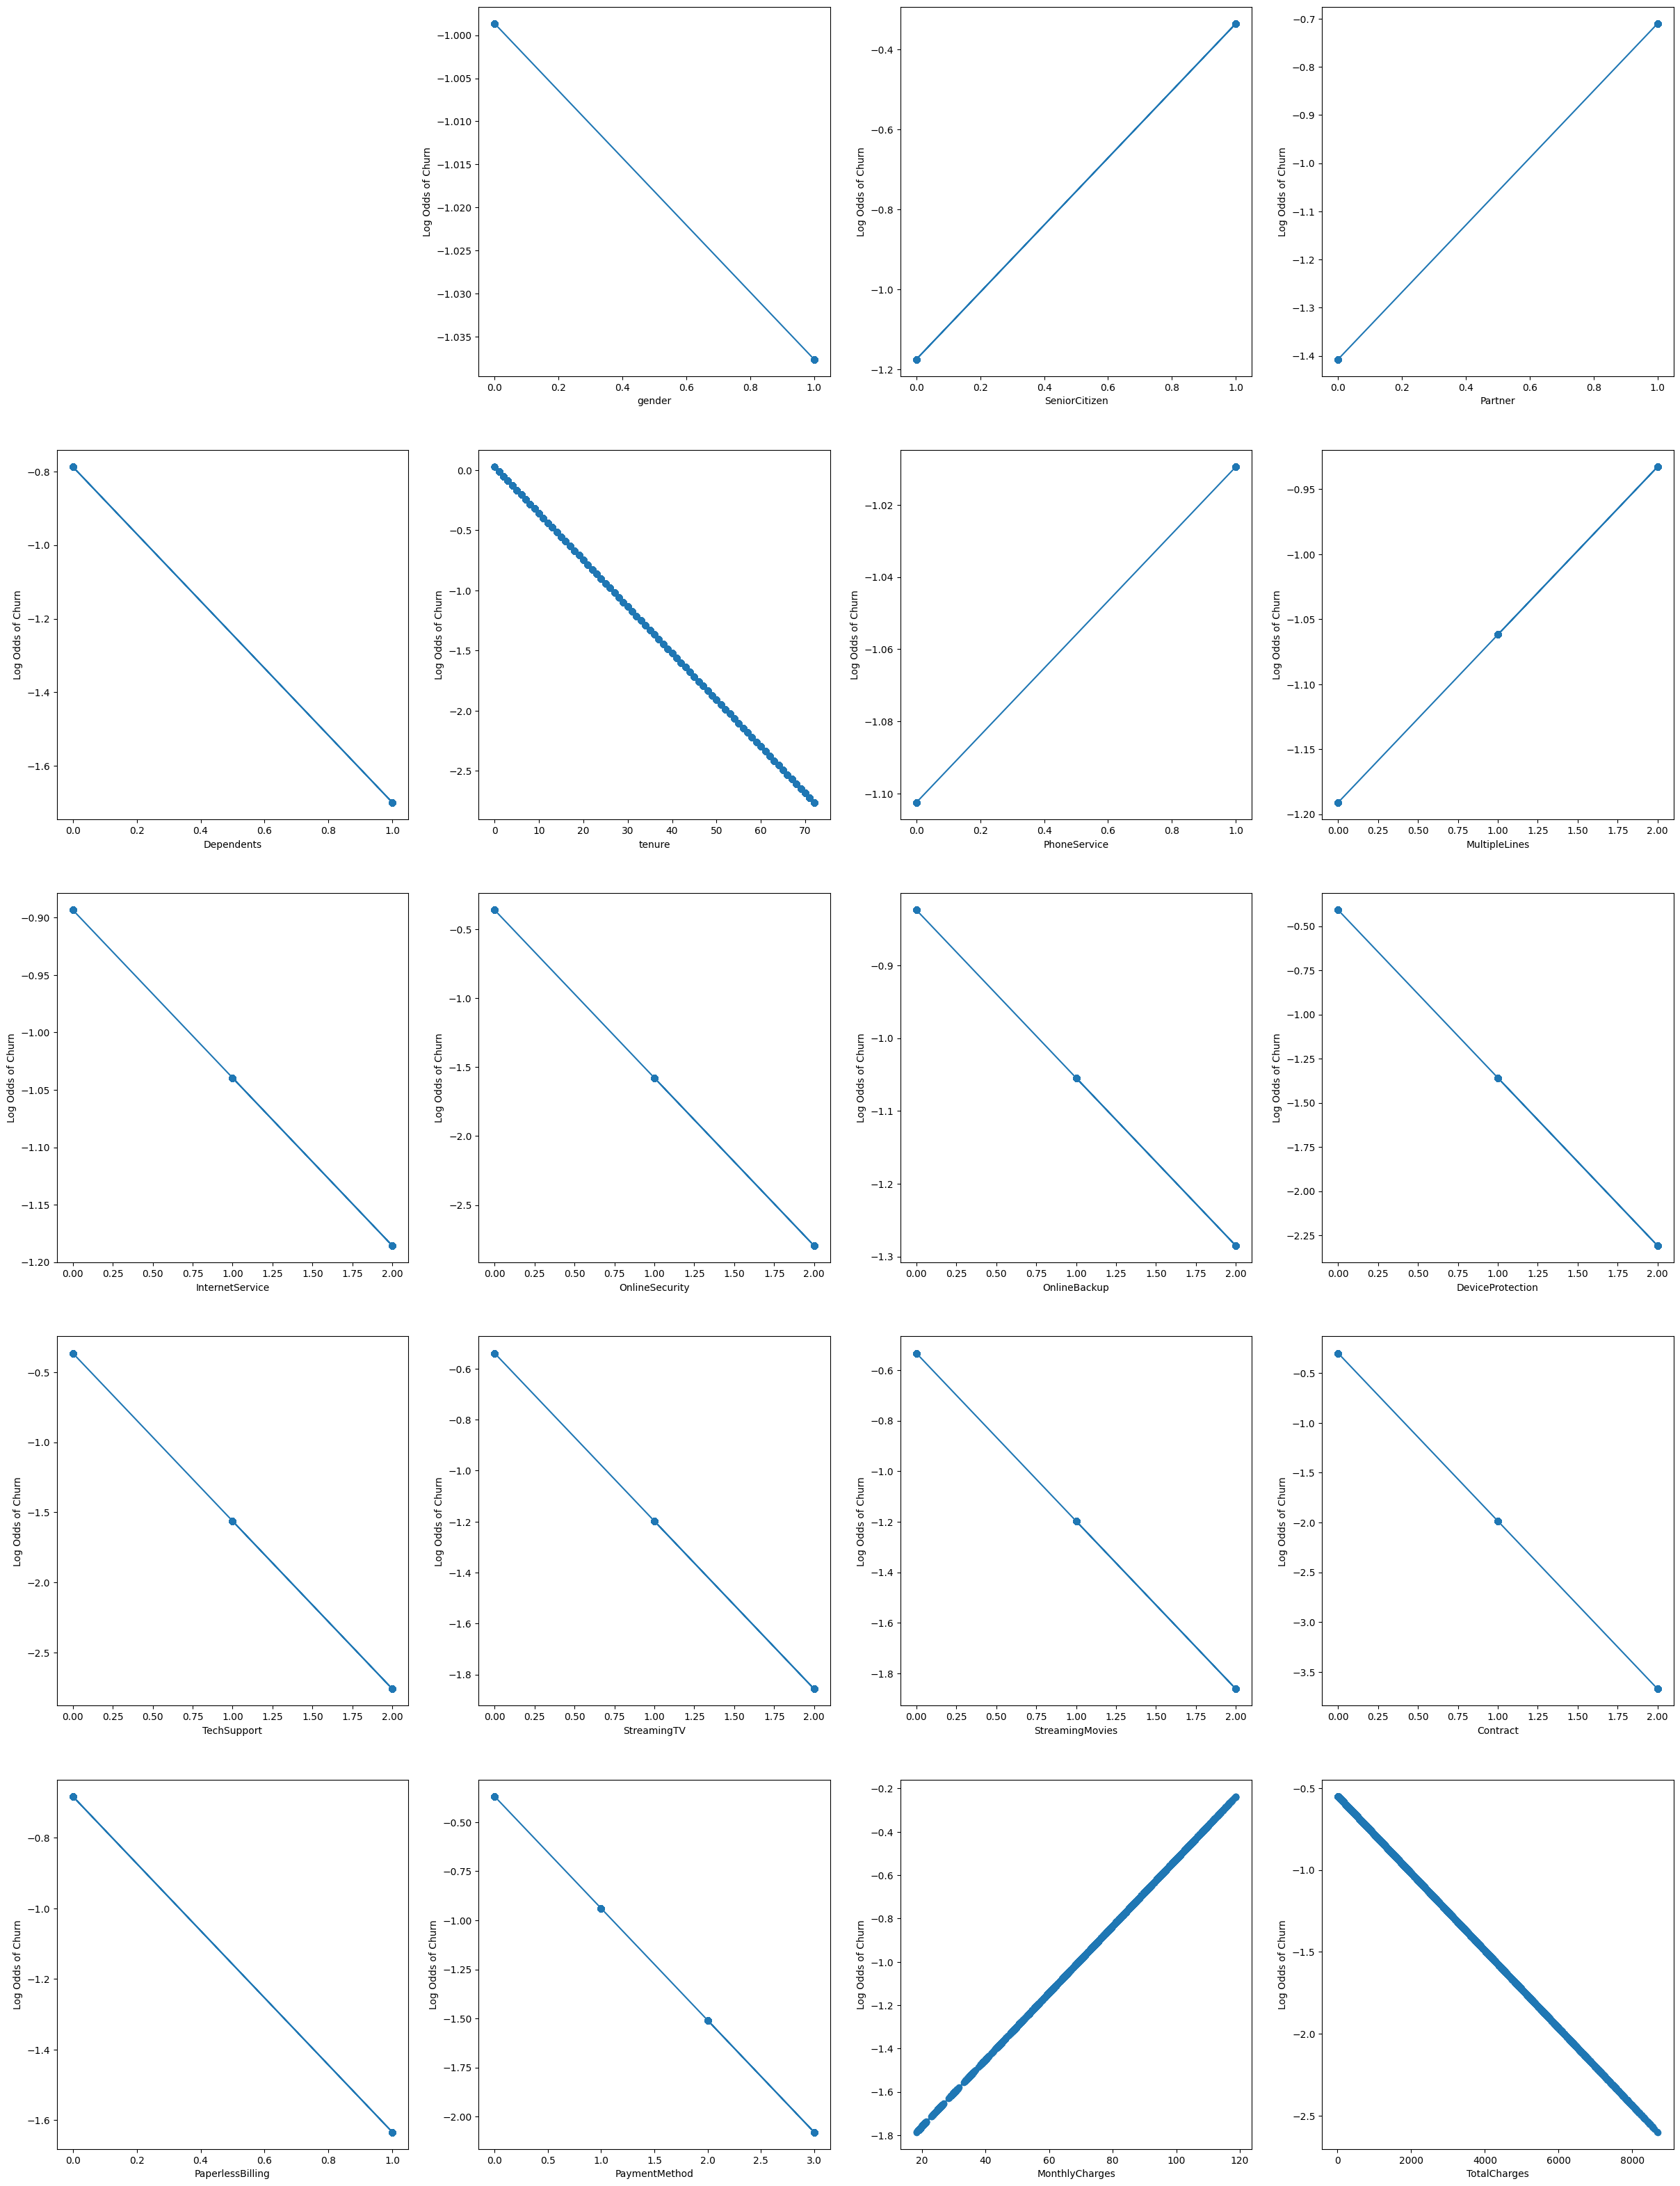

In [4]:
var_list = [item for item in ChurnData.columns if item != 'pred_prob' and item != 'log_odds' and item != 'Churn']

figure, axis = plt.subplots(5, 4, figsize=(30, 40))

iterator = -1
for i in range(5):
    for j in range(4):
        if iterator >= 0:
            ind = sm.add_constant(ChurnData[var_list[iterator]])
            dep = ChurnData['Churn']

            two_d_model = sm.Logit(endog=dep,exog=ind).fit()

            pred_probs = two_d_model.predict(ind)

            log_odds = np.log((pred_probs) / (1 - pred_probs))
            slope, intercept, rvalue, pvalue, sterr = stats.linregress(ChurnData[var_list[iterator]], log_odds)

            axis[i,j].scatter(ChurnData[var_list[iterator]], log_odds)
            axis[i,j].plot(ChurnData[var_list[iterator]], slope*ChurnData[var_list[iterator]] + intercept)
            axis[i,j].set_xlabel(var_list[iterator])
            axis[i,j].set_ylabel('Log Odds of Churn')
            iterator += 1
        else:
            iterator += 1

figure.delaxes(axis[0,0])